# **Gilmanova Islamiia, group 4167 (RCSE, GRIAT)**

## Statistical Data Analysis Course
#Topic: ***US Air pollution***






**Preparing the data**

In [1]:
!pip3 install pmdarima


In [2]:
!pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.8.0)


In [0]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import seaborn as sns
from scipy import stats

In [0]:
dfn = pd.read_csv(r'/content/drive/My Drive/uspollution_pollution_us_2000_2016.csv')
con=dfn['Date Local']
dfn['Date Local']=pd.to_datetime(dfn['Date Local'])
dfn.set_index('Date Local', inplace=True)
#check datatype of index
dfn
dfn=dfn.sort_values(by='Date Local')
#это мы сортируем  от меньшего года к большему
dfn.head()#выводим верхушку таблицы
dfn.tail()#выводим хвост таблицы - всё это чтобы понять с какого года начинается и каким кончается
dfn=dfn.loc['20100101':'20150101']

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=dfn.loc[dfn['City']!='Not in a city']
df

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
Date Local,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,32670,6,71,306,"14306 PARK AVE., VICTORVILLE, CA",California,San Bernardino,Victorville,Parts per billion,19.090909,37.0,17,35,Parts per million,0.014833,0.031,9,26,Parts per billion,0.150000,0.6,2,NaN,Parts per million,0.547826,1.20,2,NaN
2010-01-01,34049,6,71,2002,"14360 ARROW BLVD., FONTANA",California,San Bernardino,Fontana,Parts per billion,23.478261,39.0,17,37,Parts per million,0.011625,0.029,9,25,Parts per billion,1.314286,2.0,20,NaN,Parts per million,0.522222,0.90,6,10.0
2010-01-01,32671,6,71,306,"14306 PARK AVE., VICTORVILLE, CA",California,San Bernardino,Victorville,Parts per billion,19.090909,37.0,17,35,Parts per million,0.014833,0.031,9,26,Parts per billion,0.150000,0.6,2,NaN,Parts per million,0.531579,0.90,5,10.0
2010-01-01,34046,6,71,2002,"14360 ARROW BLVD., FONTANA",California,San Bernardino,Fontana,Parts per billion,23.478261,39.0,17,37,Parts per million,0.011625,0.029,9,25,Parts per billion,1.304348,2.0,0,3.0,Parts per million,0.591304,1.40,1,NaN
2010-01-01,34047,6,71,2002,"14360 ARROW BLVD., FONTANA",California,San Bernardino,Fontana,Parts per billion,23.478261,39.0,17,37,Parts per million,0.011625,0.029,9,25,Parts per billion,1.304348,2.0,0,3.0,Parts per million,0.522222,0.90,6,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,1,1,73,23,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,Parts per billion,13.916667,22.9,21,21,Parts per million,0.014167,0.023,9,21,Parts per billion,1.483333,2.7,9,3.0,Parts per million,0.229412,0.30,7,3.0
2015-01-01,2,1,73,23,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,Parts per billion,13.916667,22.9,21,21,Parts per million,0.014167,0.023,9,21,Parts per billion,1.450000,2.3,5,NaN,Parts per million,0.240000,0.37,5,NaN
2015-01-01,7977,6,1,11,1100 21st Street,California,Alameda,Oakland,Parts per billion,17.443478,39.4,21,37,Parts per million,0.018083,0.034,9,31,Parts per billion,1.050000,1.5,16,1.0,Parts per million,0.533333,1.30,23,15.0


In [7]:
df = df.loc[df['State'] == 'Missouri']
df

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
Date Local,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-07-01,78826,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,9.400000,16.9,5,15,Parts per million,0.036125,0.049,13,42,Parts per billion,2.421739,5.0,3,7.0,Parts per million,0.245250,0.332,15,NaN
2013-07-01,78827,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,9.400000,16.9,5,15,Parts per million,0.036125,0.049,13,42,Parts per billion,2.421739,5.0,3,7.0,Parts per million,0.241667,0.300,14,3.0
2013-07-01,78828,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,9.400000,16.9,5,15,Parts per million,0.036125,0.049,13,42,Parts per billion,2.171429,3.6,8,NaN,Parts per million,0.245250,0.332,15,NaN
2013-07-01,78829,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,9.400000,16.9,5,15,Parts per million,0.036125,0.049,13,42,Parts per billion,2.171429,3.6,8,NaN,Parts per million,0.241667,0.300,14,3.0
2013-07-02,78833,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,11.608333,18.2,19,17,Parts per million,0.017083,0.029,0,25,Parts per billion,0.600000,1.6,5,NaN,Parts per million,0.262500,0.300,7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,82735,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,12.241667,25.0,18,24,Parts per million,0.017000,0.022,9,20,Parts per billion,0.395455,8.0,14,11.0,Parts per million,0.238458,0.335,18,NaN
2015-01-01,79715,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,6.425000,9.9,7,8,Parts per million,0.021500,0.024,8,22,Parts per billion,1.575000,4.9,17,NaN,Parts per million,0.200000,0.200,6,2.0
2015-01-01,79714,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,6.425000,9.9,7,8,Parts per million,0.021500,0.024,8,22,Parts per billion,1.575000,4.9,17,NaN,Parts per million,0.228043,0.272,19,NaN


In [8]:
df=df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2126 entries, 2013-07-01 to 2015-01-01
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State Code         2126 non-null   int64  
 1   County Code        2126 non-null   int64  
 2   Site Num           2126 non-null   int64  
 3   Address            2126 non-null   object 
 4   State              2126 non-null   object 
 5   County             2126 non-null   object 
 6   City               2126 non-null   object 
 7   NO2 Units          2126 non-null   object 
 8   NO2 Mean           2126 non-null   float64
 9   NO2 1st Max Value  2126 non-null   float64
 10  NO2 1st Max Hour   2126 non-null   int64  
 11  NO2 AQI            2126 non-null   int64  
 12  O3 Units           2126 non-null   object 
 13  O3 Mean            2126 non-null   float64
 14  O3 1st Max Value   2126 non-null   float64
 15  O3 1st Max Hour    2126 non-null   int64  
 16  O3 AQI

In [0]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day



> Display a random sampling of 5 rows



In [10]:

df.sample(5, random_state=0)

,State Code,County Code,Site Num,Address,State,County,City,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,month,day
Date Local,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-12-25,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,8.225000,17.3,7,16,Parts per million,0.019042,0.021,9,18,Parts per billion,3.462500,5.7,14,NaN,Parts per million,0.200000,0.200,0,2.0,2013,12,25
2014-09-25,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,23.279167,41.6,7,39,Parts per million,0.029667,0.056,10,54,Parts per billion,4.662500,46.3,9,64.0,Parts per million,0.337130,0.677,6,NaN,2014,9,25
2014-05-21,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,11.237500,36.7,21,34,Parts per million,0.029792,0.046,7,43,Parts per billion,1.671429,2.2,11,NaN,Parts per million,0.245833,0.400,21,5.0,2014,5,21
2014-10-13,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,10.880952,14.6,11,13,Parts per million,0.018208,0.028,16,26,Parts per billion,2.200000,2.9,23,NaN,Parts per million,0.218565,0.671,0,NaN,2014,10,13
2014-02-09,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,12.845833,31.6,3,29,Parts per million,0.032917,0.040,11,37,Parts per billion,1.350000,2.7,5,NaN,Parts per million,0.258333,0.300,0,3.0,2014,2,9


In [11]:
print('Main statistical characteristics of data\n')
df.describe()

Main statistical characteristics of data



,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,month,day
count,2126.0,2126.0,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,1064.000000,2126.000000,2126.000000,2126.000000,1063.000000,2126.000000,2126.000000,2126.000000
mean,29.0,510.0,85.0,11.890369,24.638382,11.797742,22.786453,0.024772,0.036598,9.959548,34.223895,2.245201,6.685983,10.827846,11.011278,0.255878,0.407006,8.367357,3.776105,2013.679210,7.472248,15.889934
std,0.0,0.0,0.0,5.287921,9.654917,8.427491,9.147293,0.009463,0.013926,4.127755,15.745706,1.900744,7.182265,7.001411,12.185300,0.069181,0.210226,7.944339,1.917977,0.470905,3.261314,8.865007
min,29.0,510.0,85.0,2.933333,5.400000,0.000000,5.000000,0.000917,0.002000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,1.000000,2013.000000,1.000000,1.000000
25%,29.0,510.0,85.0,8.083333,16.900000,4.000000,15.000000,0.017677,0.026000,9.000000,23.000000,0.906534,2.200000,5.000000,3.000000,0.206136,0.300000,0.000000,3.000000,2013.000000,5.000000,8.000000
50%,29.0,510.0,85.0,11.112500,24.700000,9.000000,23.000000,0.024292,0.035000,10.000000,32.000000,1.736364,4.200000,11.000000,7.000000,0.241667,0.333000,7.000000,3.000000,2014.000000,8.000000,16.000000
75%,29.0,510.0,85.0,14.917708,30.900000,20.000000,28.000000,0.031750,0.046000,11.000000,42.000000,3.010417,8.675000,17.000000,14.000000,0.286359,0.474750,14.000000,5.000000,2014.000000,10.000000,24.000000
max,29.0,510.0,85.0,42.495833,53.900000,23.000000,50.000000,0.051833,0.075000,23.000000,101.000000,14.100000,51.400000,23.000000,70.000000,0.655043,2.147000,23.000000,16.000000,2015.000000,12.000000,31.000000


In [12]:
# Other statistical characteristics of data

profile = ProfileReport(df, html={'style':{'full_width':True}})
profile.to_file('/content/drive/My Drive/out.html')

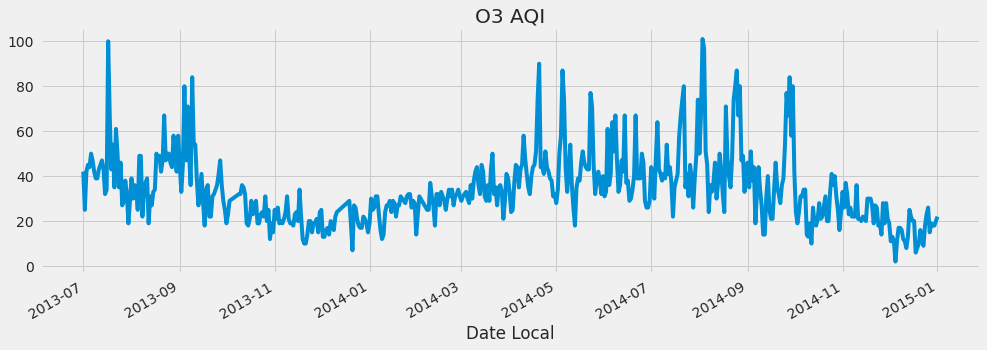

In [13]:
temp=df.groupby(['Date Local'])['O3 AQI'].mean() # AQI - Air quality index
temp.plot(figsize=(15,5), title= 'O3 AQI', fontsize=14)

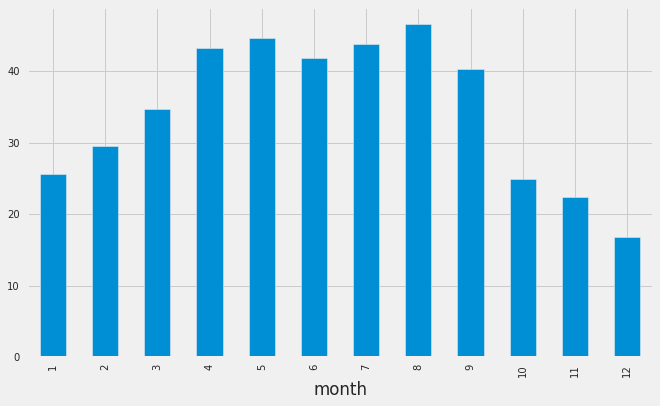

In [14]:
df.groupby('month')['O3 AQI'].mean().plot.bar()

In [15]:
df.rename(columns={'O3 AQI':'O3AQI', },inplace=True)
df

,State Code,County Code,Site Num,Address,State,County,City,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,month,day
Date Local,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-07-01,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,9.400000,16.9,5,15,Parts per million,0.036125,0.049,13,42,Parts per billion,2.421739,5.0,3,7.0,Parts per million,0.245250,0.332,15,NaN,2013,7,1
2013-07-01,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,9.400000,16.9,5,15,Parts per million,0.036125,0.049,13,42,Parts per billion,2.421739,5.0,3,7.0,Parts per million,0.241667,0.300,14,3.0,2013,7,1
2013-07-01,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,9.400000,16.9,5,15,Parts per million,0.036125,0.049,13,42,Parts per billion,2.171429,3.6,8,NaN,Parts per million,0.245250,0.332,15,NaN,2013,7,1
2013-07-01,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,9.400000,16.9,5,15,Parts per million,0.036125,0.049,13,42,Parts per billion,2.171429,3.6,8,NaN,Parts per million,0.241667,0.300,14,3.0,2013,7,1
2013-07-02,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,11.608333,18.2,19,17,Parts per million,0.017083,0.029,0,25,Parts per billion,0.600000,1.6,5,NaN,Parts per million,0.262500,0.300,7,3.0,2013,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,12.241667,25.0,18,24,Parts per million,0.017000,0.022,9,20,Parts per billion,0.395455,8.0,14,11.0,Parts per million,0.238458,0.335,18,NaN,2014,12,31
2015-01-01,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,6.425000,9.9,7,8,Parts per million,0.021500,0.024,8,22,Parts per billion,1.575000,4.9,17,NaN,Parts per million,0.200000,0.200,6,2.0,2015,1,1
2015-01-01,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,Parts per billion,6.425000,9.9,7,8,Parts per million,0.021500,0.024,8,22,Parts per billion,1.575000,4.9,17,NaN,Parts per million,0.228043,0.272,19,NaN,2015,1,1


count    2126.000000
mean       34.223895
std        15.745706
min         2.000000
25%        23.000000
50%        32.000000
75%        42.000000
max       101.000000
Name: O3AQI, dtype: float64

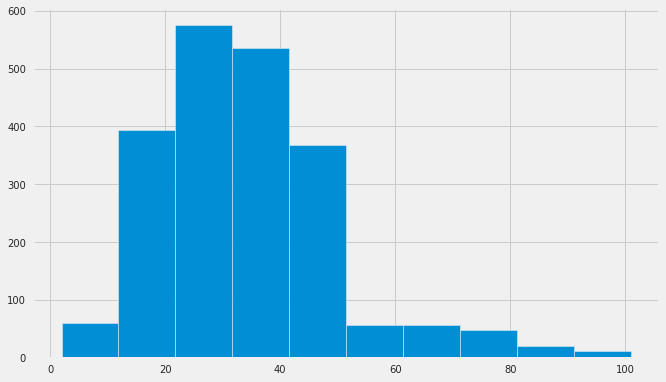

In [16]:
histogram=df.O3AQI.describe()
df.O3AQI.hist()
histogram

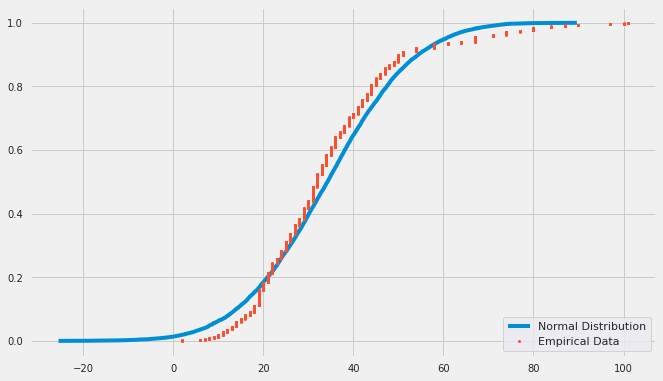

In [17]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x, y = ecdf(df['O3AQI'])

samples = np.random.normal(np.mean(df['O3AQI']), np.std(df['O3AQI']), size=10000)
x_theor, y_theor = ecdf(samples)
plt.plot(x_theor, y_theor)
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.legend(('Normal Distribution', 'Empirical Data'), loc='lower right')

## Prediction

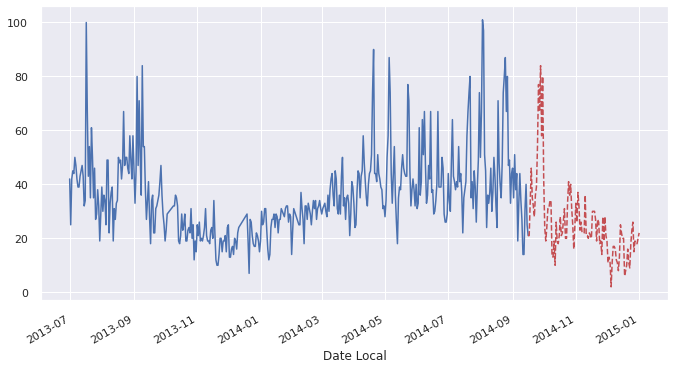

In [18]:
test = df[1701:]
train = df[:1700]
train.O3AQI.plot(style='b-')
test.O3AQI.plot(style='r--')

In [0]:
def test_stationarity(timeseries):
 #Determing rolling statistics
 rolmean = timeseries.rolling(7).mean()
 rolstd = timeseries.rolling(7).std()
 #Plot rolling statistics:
 plt.plot(timeseries, color='blue',label='Original')
 plt.plot(rolmean, color='orange', label='Rolling mean')
 plt.plot(rolstd, color='black', label = 'Rolling std')
 plt.legend(loc='Best')
 plt.title('Rolling Mean and Standard Deviation')
 plt.show(block=False)
 
 print("Results of Dickey-Fuller ")
 adftest = adfuller(timeseries,autolag='AIC')
 # output for adft will give us without defining what the values are.
 #hence we manually write what values does it explain using a for loop
 output = pd.Series(adftest[0:4],index=['Test stat.','p-value','Num. of lags used','Num of observations used'])
 for key,values in adftest[4].items():
  output['critical value (%s)'%key] = values
 print(output)



> Test the data by algorithm



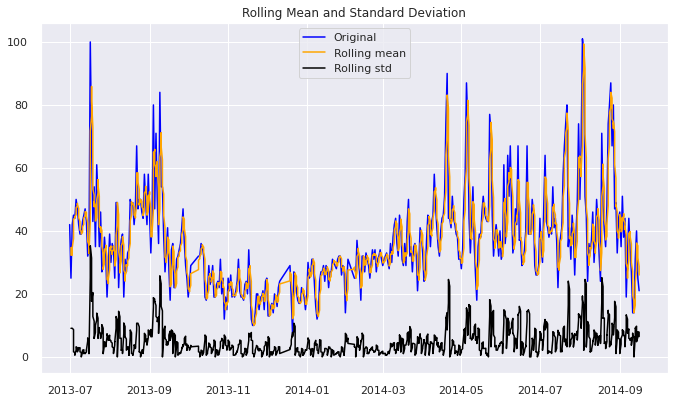

Results of Dickey-Fuller 
Test stat.                    -4.477719
p-value                        0.000216
Num. of lags used             16.000000
Num of observations used    1683.000000
critical value (1%)           -3.434241
critical value (5%)           -2.863259
critical value (10%)          -2.567685
dtype: float64


In [20]:
test_stationarity(train['O3AQI'])

**Critical value is bigger than threshold, the p-value is bigger than 5%, an we can see an decreasing trend in the data. It means that data is not stationary.**
> *Hence, we have to stationarize it*



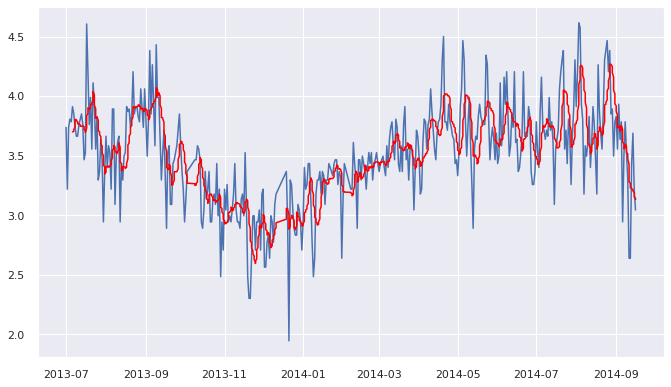

In [21]:
train_log = np.log(train['O3AQI']) 
test_log = np.log(test['O3AQI'])
moving_avg = train_log.rolling(24).mean() 
plt.plot(train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()



> We can observe that there is a trend, so it is not stationary. Now we will remove this trend to make our time series stationary.



In [0]:
train_log_moving_average_diff = train_log - moving_avg

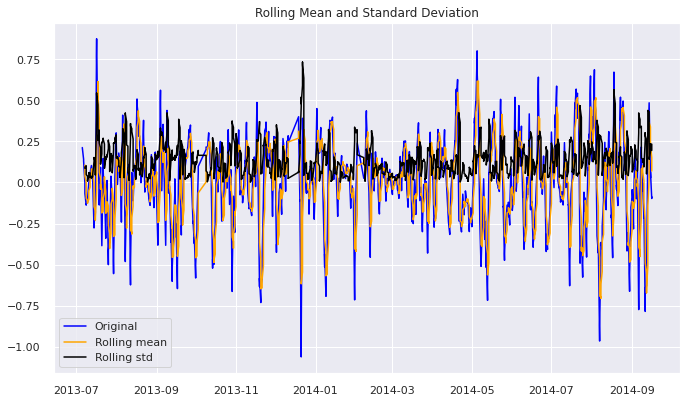

Results of Dickey-Fuller 
Test stat.                 -1.096926e+01
p-value                     7.957065e-20
Num. of lags used           1.900000e+01
Num of observations used    1.657000e+03
critical value (1%)        -3.434303e+00
critical value (5%)        -2.863286e+00
critical value (10%)       -2.567699e+00
dtype: float64


(None, None)

In [23]:
train_log_moving_average_diff.dropna(inplace = True), test_stationarity(train_log_moving_average_diff)



> Now, the Test Statistic is less than the Critical Value and the p-value is less than 5%. So, we can be confident that the trend is almost removed.





> ***Now  we should stabilize the variance, b.c. it is also a requirement of stationary time series***




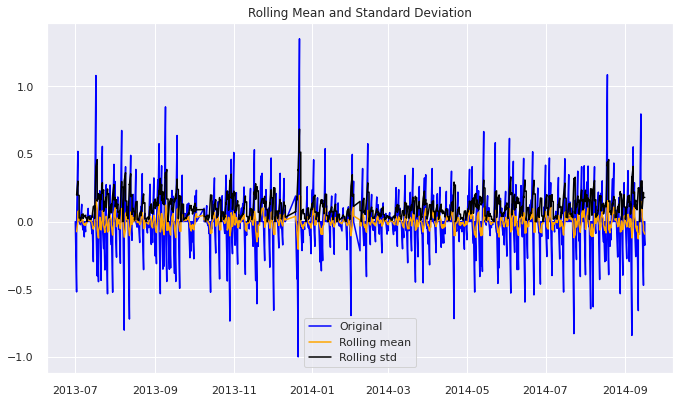

Results of Dickey-Fuller 
Test stat.                 -1.590032e+01
p-value                     8.343604e-29
Num. of lags used           1.500000e+01
Num of observations used    1.683000e+03
critical value (1%)        -3.434241e+00
critical value (5%)        -2.863259e+00
critical value (10%)       -2.567685e+00
dtype: float64


In [24]:
train_log_diff = train_log - train_log.shift(1) 
test_stationarity(train_log_diff.dropna())



> Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.

We are removing the seasonal part 



Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=-1676.409, BIC=-1643.783, Time=4.203 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-1497.700, BIC=-1486.824, Time=0.178 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-1495.700, BIC=-1479.387, Time=0.139 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-1495.700, BIC=-1479.387, Time=0.299 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-1499.688, BIC=-1494.251, Time=0.117 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=-1491.700, BIC=-1464.511, Time=0.491 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=-1491.700, BIC=-1464.511, Time=0.519 seconds
Fit ARIMA(3,1,2)x(0,0,0,0) [intercept=True]; AIC=-1674.390, BIC=-1636.325, Time=3.873 seconds
Fit ARIMA(2,1,3)x(0,0,0,0) [intercept=True]; AIC=-1674.389, BIC=-1636.324, Time=3.169 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-1493.700, BIC=-1471.949, Time=0.445 seconds
Fit ARIMA(1,1,3)

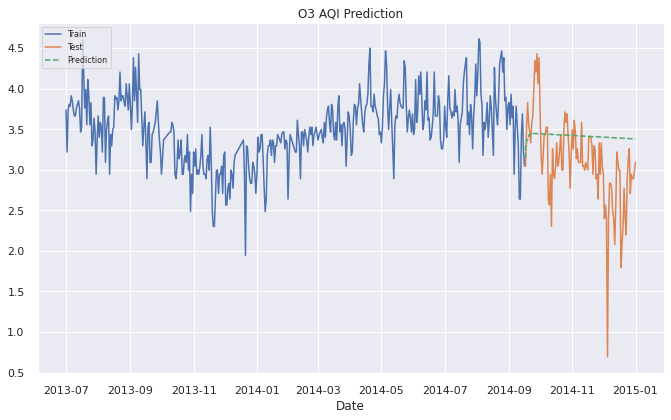

In [25]:
from pmdarima import auto_arima
model = auto_arima(train_log, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_log)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test_log.index,columns=['Prediction'])
#plot the predictions for validation set
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(forecast,'g--', label='Prediction')
plt.title('O3 AQI Prediction')
plt.xlabel('Date')
plt.legend(loc='upper left', fontsize=8)
plt.show()



> We will use the RMSE(Root Mean Square Error) to judge our forecast results



In [26]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test_log,forecast))
print("RMSE: ", rms)

RMSE:  0.6113304425383331


**Well, 7% of error is a VERY GOOD result in our case**

In [0]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [0]:
#Setup Helper Functions
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

# Loading Data and Basic Exploration

In [0]:
data = pd.read_csv("/content/drive/My Drive/uspollution_pollution_us_2000_2016.csv")

In [30]:
data.shape

(1746661, 29)

In [31]:
data.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [32]:
data.head(3)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.0225,0.04,10,34,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.0225,0.04,10,34,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.0225,0.04,10,34,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN


In [0]:
MIS_mask = data['State'].str.contains('Missouri')
mis = data[MIS_mask]

In [34]:
mis

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
56726,56726,29,189,4,"Sunset Hills: 4580 South Lindbergh & Gravios, ...",Missouri,Saint Louis,Sunset Hills,2000-03-31,Parts per billion,31.916667,52.0,22,49,Parts per million,0.003000,0.003,22,3,Parts per billion,6.208333,10.0,14,14.0,Parts per million,0.858333,1.600,22,NaN
56727,56727,29,189,4,"Sunset Hills: 4580 South Lindbergh & Gravios, ...",Missouri,Saint Louis,Sunset Hills,2000-03-31,Parts per billion,31.916667,52.0,22,49,Parts per million,0.003000,0.003,22,3,Parts per billion,6.208333,10.0,14,14.0,Parts per million,0.850000,1.100,7,13.0
56728,56728,29,189,4,"Sunset Hills: 4580 South Lindbergh & Gravios, ...",Missouri,Saint Louis,Sunset Hills,2000-03-31,Parts per billion,31.916667,52.0,22,49,Parts per million,0.003000,0.003,22,3,Parts per billion,6.187500,9.0,14,NaN,Parts per million,0.858333,1.600,22,NaN
56729,56729,29,189,4,"Sunset Hills: 4580 South Lindbergh & Gravios, ...",Missouri,Saint Louis,Sunset Hills,2000-03-31,Parts per billion,31.916667,52.0,22,49,Parts per million,0.003000,0.003,22,3,Parts per billion,6.187500,9.0,14,NaN,Parts per million,0.850000,1.100,7,13.0
56730,56730,29,189,4,"Sunset Hills: 4580 South Lindbergh & Gravios, ...",Missouri,Saint Louis,Sunset Hills,2000-04-01,Parts per billion,33.625000,51.0,22,48,Parts per million,0.019333,0.037,10,31,Parts per billion,14.833333,93.0,10,109.0,Parts per million,0.816667,1.500,22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737022,14965,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,2016-03-30,Parts per billion,11.884211,37.2,15,35,Parts per million,0.029708,0.036,20,33,Parts per billion,0.757143,1.0,17,NaN,Parts per million,0.329167,0.400,15,5.0
1737023,14966,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,2016-03-31,Parts per billion,5.916667,15.2,6,14,Parts per million,0.033737,0.038,9,35,Parts per billion,1.245455,1.9,12,1.0,Parts per million,0.271708,0.315,7,NaN
1737024,14967,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,2016-03-31,Parts per billion,5.916667,15.2,6,14,Parts per million,0.033737,0.038,9,35,Parts per billion,1.245455,1.9,12,1.0,Parts per million,0.279167,0.300,0,3.0
1737025,14968,29,510,85,"BLAIR STREET: 3247 Blair Street, St. Louis, MO...",Missouri,St. Louis City,St. Louis,2016-03-31,Parts per billion,5.916667,15.2,6,14,Parts per million,0.033737,0.038,9,35,Parts per billion,1.185714,1.4,8,NaN,Parts per million,0.271708,0.315,7,NaN


In [0]:
del mis['State']
del mis['Unnamed: 0']
del mis['State Code']
del mis['City']
del mis['Address']

In [36]:
mis.head()

,County Code,Site Num,County,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
56726,189,4,Saint Louis,2000-03-31,Parts per billion,31.916667,52.0,22,49,Parts per million,0.003000,0.003,22,3,Parts per billion,6.208333,10.0,14,14.0,Parts per million,0.858333,1.6,22,NaN
56727,189,4,Saint Louis,2000-03-31,Parts per billion,31.916667,52.0,22,49,Parts per million,0.003000,0.003,22,3,Parts per billion,6.208333,10.0,14,14.0,Parts per million,0.850000,1.1,7,13.0
56728,189,4,Saint Louis,2000-03-31,Parts per billion,31.916667,52.0,22,49,Parts per million,0.003000,0.003,22,3,Parts per billion,6.187500,9.0,14,NaN,Parts per million,0.858333,1.6,22,NaN
56729,189,4,Saint Louis,2000-03-31,Parts per billion,31.916667,52.0,22,49,Parts per million,0.003000,0.003,22,3,Parts per billion,6.187500,9.0,14,NaN,Parts per million,0.850000,1.1,7,13.0
56730,189,4,Saint Louis,2000-04-01,Parts per billion,33.625000,51.0,22,48,Parts per million,0.019333,0.037,10,31,Parts per billion,14.833333,93.0,10,109.0,Parts per million,0.816667,1.5,22,NaN


In [37]:
mis.shape

(19778, 24)

In [38]:
mis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19778 entries, 56726 to 1737026
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   County Code        19778 non-null  int64  
 1   Site Num           19778 non-null  int64  
 2   County             19778 non-null  object 
 3   Date Local         19778 non-null  object 
 4   NO2 Units          19778 non-null  object 
 5   NO2 Mean           19778 non-null  float64
 6   NO2 1st Max Value  19778 non-null  float64
 7   NO2 1st Max Hour   19778 non-null  int64  
 8   NO2 AQI            19778 non-null  int64  
 9   O3 Units           19778 non-null  object 
 10  O3 Mean            19778 non-null  float64
 11  O3 1st Max Value   19778 non-null  float64
 12  O3 1st Max Hour    19778 non-null  int64  
 13  O3 AQI             19778 non-null  int64  
 14  SO2 Units          19778 non-null  object 
 15  SO2 Mean           19778 non-null  float64
 16  SO2 1st Max Valu

In [0]:
del mis['NO2 Units']
del mis['NO2 1st Max Hour']
del mis['O3 Units']
del mis['O3 1st Max Hour']
del mis['SO2 Units']
del mis['SO2 1st Max Hour']
del mis['CO Units']
del mis['CO 1st Max Hour']

In [40]:
mis.head(2)

,County Code,Site Num,County,Date Local,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
56726,189,4,Saint Louis,2000-03-31,31.916667,52.0,49,0.003,0.003,3,6.208333,10.0,14.0,0.858333,1.6,NaN
56727,189,4,Saint Louis,2000-03-31,31.916667,52.0,49,0.003,0.003,3,6.208333,10.0,14.0,0.850000,1.1,13.0


In [41]:
mis.shape

(19778, 16)

In [42]:
mis.describe()

,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
count,19778.000000,19778.000000,19778.000000,19778.000000,19778.000000,19778.000000,19778.000000,19778.000000,19778.000000,19778.000000,9890.000000,19778.000000,19778.000000,9893.000000
mean,370.160987,1919.018607,14.961034,30.941693,29.170695,0.027786,0.044046,41.910911,3.447383,10.689048,18.319515,0.467052,0.746112,7.413727
std,159.168636,2907.457015,6.858521,13.285932,12.751620,0.011378,0.017150,24.313019,2.774262,10.211513,16.339316,0.236956,0.506653,4.536744
min,189.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189.000000,85.000000,9.958333,21.000000,20.000000,0.019833,0.032000,27.000000,1.421739,4.000000,7.000000,0.300000,0.400000,5.000000
50%,510.000000,86.000000,14.041667,29.300000,27.000000,0.027458,0.043000,36.000000,2.862500,8.000000,14.000000,0.425000,0.600000,7.000000
75%,510.000000,5001.000000,18.958333,39.000000,37.000000,0.035083,0.055000,47.000000,4.809524,14.000000,24.000000,0.587500,0.900000,9.000000
max,510.000000,7003.000000,48.428571,85.000000,84.000000,0.067125,0.116000,201.000000,26.125000,172.000000,144.000000,3.358333,8.100000,72.000000


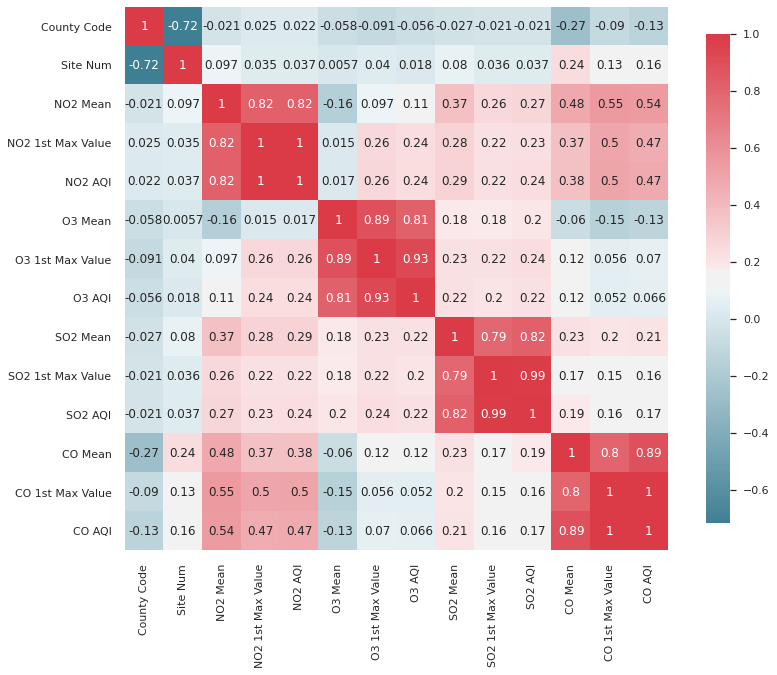

In [43]:
plot_correlation_map(mis)

# Creating New data frame by removing unnecessary columns. Then using interpolate() and dropna() to treat NaN and NA values.

In [0]:
newdata = pd.DataFrame(mis, columns = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 AQI', 'O3 Mean', 'O3 1st Max Value', 'O3 AQI', 'SO2 Mean', 'SO2 1st Max Value', 'SO2 AQI', 'CO Mean', 'CO 1st Max Value', 'CO AQI']) 

In [45]:
newdata.isnull().any()

NO2 Mean             False
NO2 1st Max Value    False
NO2 AQI              False
O3 Mean              False
O3 1st Max Value     False
O3 AQI               False
SO2 Mean             False
SO2 1st Max Value    False
SO2 AQI               True
CO Mean              False
CO 1st Max Value     False
CO AQI                True
dtype: bool

In [46]:
newdata.shape

(19778, 12)

In [47]:
X = newdata.interpolate()
X.shape

(19778, 12)

In [48]:
X.isnull().any()

NO2 Mean             False
NO2 1st Max Value    False
NO2 AQI              False
O3 Mean              False
O3 1st Max Value     False
O3 AQI               False
SO2 Mean             False
SO2 1st Max Value    False
SO2 AQI              False
CO Mean              False
CO 1st Max Value     False
CO AQI                True
dtype: bool

In [49]:
X = X.dropna()
X.shape

(19777, 12)

# Creating new dataset free of NaN values and exploring.

In [50]:
x_before_pca = pd.DataFrame(X)
x_before_pca.describe()

,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
count,19777.000000,19777.000000,19777.000000,19777.000000,19777.000000,19777.000000,19777.000000,19777.000000,19777.000000,19777.000000,19777.000000,19777.000000
mean,14.960176,30.940628,29.169692,0.027788,0.044048,41.912879,3.447244,10.689083,18.320524,0.467033,0.746069,7.413612
std,6.857635,13.285424,12.751163,0.011377,0.017148,24.312059,2.774262,10.211770,14.978613,0.236945,0.506630,4.445404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.958333,21.000000,20.000000,0.019833,0.032000,27.000000,1.421739,4.000000,7.333333,0.300000,0.400000,5.000000
50%,14.041667,29.300000,27.000000,0.027458,0.043000,36.000000,2.862500,8.000000,15.000000,0.425000,0.600000,7.000000
75%,18.958333,39.000000,37.000000,0.035083,0.055000,47.000000,4.809524,14.000000,24.666667,0.587500,0.900000,9.000000
max,48.428571,85.000000,84.000000,0.067125,0.116000,201.000000,26.125000,172.000000,144.000000,3.358333,8.100000,72.000000


In [51]:
x_before_pca.shape

(19777, 12)

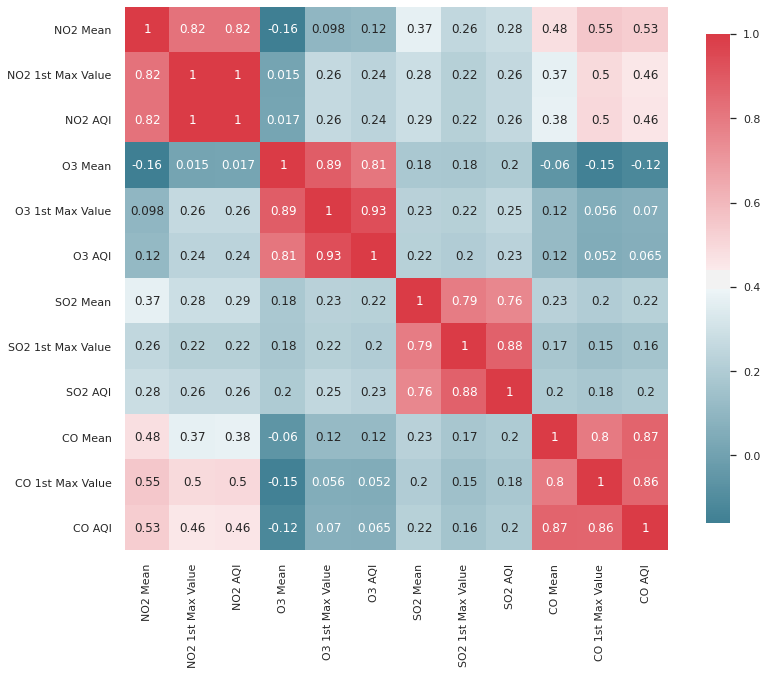

In [52]:
plot_correlation_map(x_before_pca)

# Using PCA to reduce variables.

### First we apply PCA for all the 12 variables (n_components = 12), i.e., we create 12 PCs. Then we see the amount of variance that each PC explains and plot that. Based on that, we select the number of PCs that we need.

In [0]:
from sklearn.decomposition import PCA as PCA
# RandomizedPCA = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

In [0]:
pca = PCA(n_components=12)

In [55]:
pca.fit(x_before_pca)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
#The amount of variance that each PC explains
var = pca.explained_variance_ratio_

In [0]:
#Cumulative Variance explains
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [58]:
var1

array([ 51.01,  77.66,  96.34,  97.71,  99.04,  99.81,  99.99, 100.  ,
       100.  , 100.  , 100.  , 100.  ])

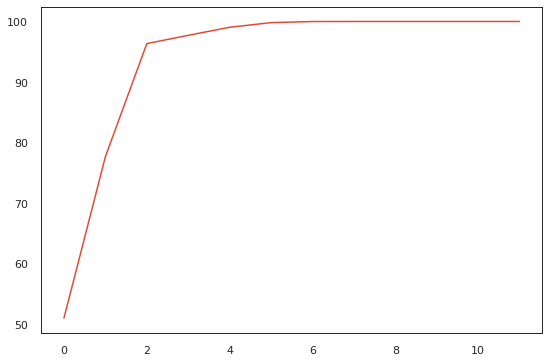

In [59]:
plt.plot(var1)

### So we will have 3 (although the ideal is 2) PCs.

In [0]:
x_pca = PCA(n_components=3)

In [61]:
x_pca.fit(x_before_pca)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x = x_pca.fit_transform(x_before_pca)

In [63]:
type(x[:,0])

numpy.ndarray

In [64]:
x.shape

(19777, 3)

In [0]:
d = {'pc1': x[:,0], 'pc2': x[:, 1], 'pc3': x[:,2]}
x_df = pd.DataFrame(d)

### x_df is the principal component data frame. Each column represents a principal component, and each row represents the set of PCs that explains that specific training example.

In [66]:
x_df.shape

(19777, 3)

In [67]:
x_df.head(3)

,pc1,pc2,pc3
0,-21.221637,-43.302893,-17.812267
1,-12.535846,-54.468278,3.666385
2,-3.680521,-65.850717,25.616099


In [68]:
x_df.describe()

,pc1,pc2,pc3
count,1.977700e+04,1.977700e+04,1.977700e+04
mean,-1.772261e-14,-4.195102e-15,6.645507e-16
std,2.608175e+01,1.885275e+01,1.578396e+01
min,-5.112666e+01,-9.098359e+01,-5.003469e+01
25%,-1.717052e+01,-1.139926e+01,-9.802194e+00
50%,-5.275606e+00,7.908211e-01,-1.360396e+00
75%,1.019921e+01,1.230077e+01,7.767889e+00
max,1.520849e+02,9.392829e+01,1.554456e+02


In [0]:
x_new_ndarray = x_pca.inverse_transform(x_df)
x_new = pd.DataFrame(x_new_ndarray)
x_new.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12']

### x_new is the reconstructed data from the PC data frame x_df.

In [70]:
x_new.shape

(19777, 12)

In [71]:
x_new.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,26.033081,53.324449,50.617913,0.007959,0.019514,2.791594,3.361008,8.626529,15.612832,0.615889,1.268621,11.505077
1,26.925108,53.198619,50.527902,0.008911,0.020326,2.894373,6.433214,22.620775,36.943694,0.650615,1.312513,12.075070
2,27.827377,53.050374,50.417044,0.009885,0.021151,2.995848,9.570143,36.911971,58.726508,0.685943,1.356940,12.653980


In [72]:
x_before_pca.head(3)

,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
56727,31.916667,52.0,49,0.003,0.003,3,6.208333,10.0,14.000000,0.850000,1.1,13.0
56728,31.916667,52.0,49,0.003,0.003,3,6.187500,9.0,45.666667,0.858333,1.6,13.0
56729,31.916667,52.0,49,0.003,0.003,3,6.187500,9.0,77.333333,0.850000,1.1,13.0


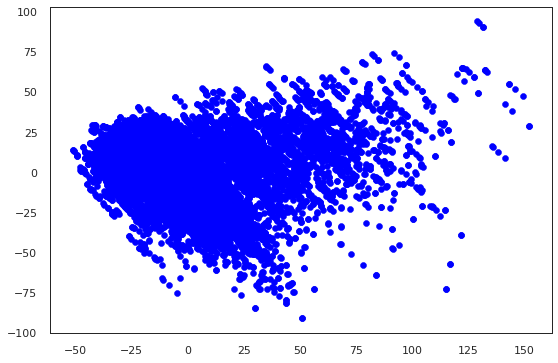

In [73]:
plt.scatter(x_df['pc1'], x_df['pc2'], color = 'blue')

In [0]:
from mpl_toolkits.mplot3d import Axes3D

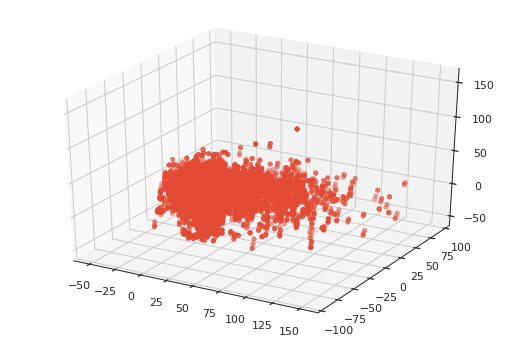

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = x_df['pc1'], ys = x_df['pc2'], zs= x_df['pc3'], zdir='z')

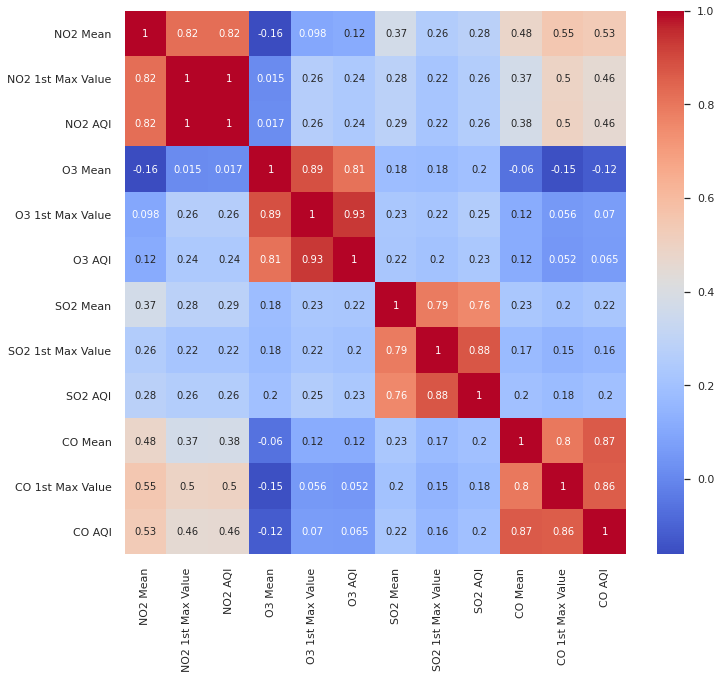

In [76]:
plt.figure(figsize = (10,10))
sns.heatmap(x_before_pca.corr('pearson'),annot=True, cmap="coolwarm")

In [77]:
x_before_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19777 entries, 56727 to 1737026
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NO2 Mean           19777 non-null  float64
 1   NO2 1st Max Value  19777 non-null  float64
 2   NO2 AQI            19777 non-null  int64  
 3   O3 Mean            19777 non-null  float64
 4   O3 1st Max Value   19777 non-null  float64
 5   O3 AQI             19777 non-null  int64  
 6   SO2 Mean           19777 non-null  float64
 7   SO2 1st Max Value  19777 non-null  float64
 8   SO2 AQI            19777 non-null  float64
 9   CO Mean            19777 non-null  float64
 10  CO 1st Max Value   19777 non-null  float64
 11  CO AQI             19777 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 2.0 MB


In [0]:
from __future__ import print_function

import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt

#importing lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go
# init_notebook_mode()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
features_values = x_before_pca[['NO2 Mean',
                            'NO2 1st Max Value',
                            'NO2 AQI','O3 Mean',
                            'O3 1st Max Value',
                            'SO2 Mean',
                            'SO2 1st Max Value',
                            'SO2 AQI','CO Mean',
                            'CO 1st Max Value'
                            ]]
features = ['NO2 Mean','NO2 1st Max Value','NO2 AQI','O3 Mean','O3 1st Max Value','SO2 Mean','SO2 1st Max Value','SO2 AQI','CO Mean','CO 1st Max Value','CO AQI']
target = x_before_pca['O3 AQI']

In [0]:
X=features_values
y=target
# Splitting the into sets of training and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
np.set_printoptions(precision=3)

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [82]:
# Linear regression (OLS - ordinary least squares)
# Fit on train set
lr = LinearRegression()
lr.fit(X_train, y_train)
# coef_ - is an array of 11 elements (since 11 features)
print(np.ravel(lr.coef_))

[ 1.883  5.754 -7.897 -2.378 25.242  0.773 -0.039 -0.705 -0.177 -0.344]


In [83]:
Linear = LinearRegression(fit_intercept=True)
mo = Linear.fit(X_train,y_train)
predi = mo.predict(X_test)
print(r2_score(y_test,predi))

0.873971194103434


In [84]:
# Predict on test data
y_prediction = lr.predict(X_test)
# correct result; round of prediction, prediction
for i in range(0,15):
    print(y_test.values[i], np.round(y_prediction[i], 0), ' <- ', y_prediction[i])

42 49.0  <-  49.46584312860875
14 7.0  <-  6.66080448427109
34 37.0  <-  36.70958875891475
84 76.0  <-  75.79717650106718
93 84.0  <-  83.61592481234709
27 26.0  <-  25.510279730950483
23 19.0  <-  18.8135387215887
37 41.0  <-  41.37718544305107
18 9.0  <-  8.805559126398222
42 48.0  <-  48.49938521241297
30 27.0  <-  26.543455159617388
44 46.0  <-  46.0493278250712
21 18.0  <-  17.843570733715424
48 60.0  <-  59.57774028336068
34 38.0  <-  37.56770446335831


Correlation:  0.93488


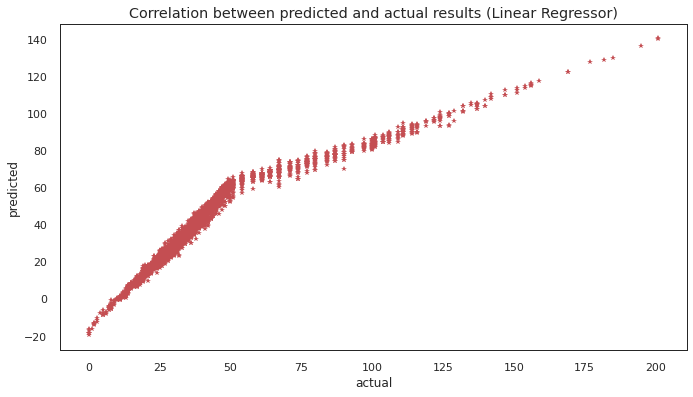

In [85]:
print('Correlation: ', round(np.corrcoef(np.ravel(y_test), np.ravel(y_prediction))[0,1], 5))
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between predicted and actual results (Linear Regressor)')
plt.plot(y_test, y_prediction, 'r*')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [86]:
print('R^2: ', lr.score(X_test, y_test))

R^2:  0.873971194103434


In [87]:
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))
print('RMSE: ', RMSE)

RMSE:  8.619726900023245


In [88]:
# Calculate the absolute errors
errors = abs(np.ravel(y_prediction) - np.ravel(y_test))

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 6.35 degrees.


In [89]:
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)


Error = np.mean(np.abs(np.subtract(y_test,y_prediction)))
Average = np.mean(y_test)
MAPE = (Error/Average)*100

print('MAPE=',MAPE,'%.')
print('Accuracy=',100-MAPE,'%.')

MAPE= 15.106747020763587 %.
Accuracy= 84.89325297923641 %.


In [90]:
###
# Polynomial regression
# Fit on train set
model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)
X_test_ = model.fit_transform(X_test)

plr = LinearRegression()
plr.fit(X_train_, y_train)
predicted_data = plr.predict(X_test_)


# predicted_data = np.round_(predicted_data)
# correct result; round of prediction, prediction
for i in range(0,15):
    print(y_test.values[i], np.round(predicted_data[i], 0), ' <- ', predicted_data[i])

42 44.0  <-  43.71823654887201
14 17.0  <-  16.649297757126302
34 32.0  <-  32.025862773838355
84 81.0  <-  80.59780563972001
93 90.0  <-  89.65984827634384
27 26.0  <-  25.655096804721893
23 22.0  <-  21.548260279312785
37 35.0  <-  35.43952883338035
18 18.0  <-  17.866608531361607
42 43.0  <-  42.8510691955704
30 27.0  <-  27.1957952766627
44 44.0  <-  43.97256994502265
21 18.0  <-  17.711622452295185
48 55.0  <-  55.293977663206576
34 30.0  <-  30.213321273458703


In [91]:
# Evaluate R^2 for Polynomial Regression 
# degree = 2 => R^2 = 0.318
# degree = 3 => R^2 = 0.307
# degree = 4 => R^2 = -205.13
print('R^2: ', plr.score(X_test_, y_test))

R^2:  0.9708140622718042


In [92]:
# Evaluate accuracy for Polynomial Regression using (RMSE)
# degree = 2 => RMSE = 0.71
# degree = 3 => RMSE = 0.715
# degree = 4 => RMSE = 12.345
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=predicted_data))
print('RMSE: ', RMSE)

RMSE:  4.148063740574848


In [93]:
# Evaluate squared errors for Polynomial Regression using
# degree = 2 => sqErr = 0.499
# degree = 3 => sqErr = 0.515
# degree = 4 => sqErr = 1.273
print('squared errors: ', 
      round(sum(np.ravel(abs(y_test - np.around(predicted_data)))) / len(y_test), 3))

squared errors:  3.259


In [94]:
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)


Error = np.mean(np.abs(np.subtract(y_test,predicted_data)))
Average = np.mean(y_test)
MAPE = (Error/Average)*100

print('MAPE=',MAPE,'%.')
print('Accuracy=',100-MAPE,'%.')

MAPE= 7.775278149479112 %.
Accuracy= 92.2247218505209 %.


In [95]:
# Train Model
# Instantiate model 
rfg = RandomForestRegressor(n_estimators= 1000, random_state=42, criterion = 'mse', max_depth = None,
                            min_samples_split = 2, min_samples_leaf = 1)

# Train the model on training data
rfg.fit(X_train, np.ravel(y_train));

# Make Predictions on Test Data
# Use the forest's predict method on the test data
y_prediction = rfg.predict(X_test)

# correct result; round of prediction, prediction
for i in range(0,15):
    print(y_test.values[i], np.round(y_prediction[i], 0), ' <- ', y_prediction[i])

42 42.0  <-  42.0
14 14.0  <-  14.094
34 34.0  <-  34.0
84 84.0  <-  84.286
93 93.0  <-  93.0
27 27.0  <-  27.064
23 23.0  <-  23.115
37 37.0  <-  37.0
18 17.0  <-  16.789
42 44.0  <-  43.604
30 30.0  <-  30.028
44 43.0  <-  43.118
21 21.0  <-  21.0
48 48.0  <-  48.0
34 34.0  <-  34.0


Correlation:  0.99942


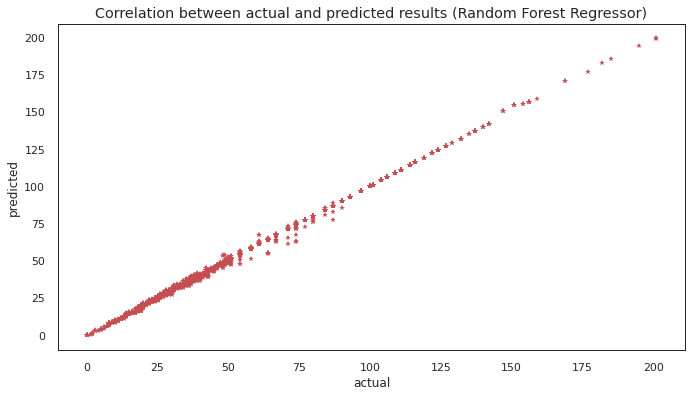

In [96]:
print('Correlation: ', round(np.corrcoef(np.ravel(y_test), np.ravel(rfg.predict(X_test)))[0,1], 5))
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between actual and predicted results (Random Forest Regressor)')
plt.plot(y_test, y_prediction, 'r*')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [97]:
# results are better than for Linear regression
# for Linear regression: R^2 = 0.276; RMSE = 0.73; sq errors = 0.526
print('R^2: ', rfg.score(X_test, y_test))

R^2:  0.9988212579934133


In [98]:
# Evaluate accuracy using root-mean-square-error (RMSE) = 0.603
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=rfg.predict(X_test)))
print('RMSE: ', RMSE)

RMSE:  0.8336197126559657


In [99]:
print('squared errors: ', 
      round(sum(np.ravel(abs(np.ravel(y_test) - np.around(y_prediction)))) / len(y_test), 3))

squared errors:  0.296


In [100]:
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)


Error = np.mean(np.abs(np.subtract(y_test,y_prediction)))
Average = np.mean(y_test)
MAPE = (Error/Average)*100

print('MAPE=',MAPE,'%.')
print('Accuracy=',100-MAPE,'%.')



MAPE= 0.769171955364392 %.
Accuracy= 99.23082804463562 %.


In [101]:
###
# Random Forest Classifier
# A random forest is a meta estimator that fits a number of decision tree classifiers on various
# sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
# The sub-sample size is always the same as the original input sample size
# but the samples are drawn with replacement if bootstrap=True (default).
# n_estimators - The number of trees on the forest

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, np.ravel(y_train))
pred_rfc = rfc.predict(X_test)
# print some values (correct and predicted ones)
print('correct:  ', np.ravel(y_test.values[0:15]))
print('predicted:', pred_rfc[0:15])

correct:   [42 14 34 84 93 27 23 37 18 42 30 44 21 48 34]
predicted: [42 14 34 84 93 27 23 37 18 42 30 44 21 48 34]


In [102]:
# print quality labels
for i in range(3,10):
    print('     ' + str(i), end='')
print('\n')
pred_prob = rfc.predict_proba(X_test)[0:15]
# print correct result and predicted probabilities for each value
for i in range(0,15):
    print(y_test.values[i], pred_prob[i])

     3     4     5     6     7     8     9

42 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.03  0.01  0.04  0.035 0.04  0.73  0.025 0.015 0.025 0.015 0.
 0.005 0.015 0.    0.    0.015 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.   ]
14 [0.    0.    0.    0.    0.    0.    0.    0.    0.005 0.    0.    0.025
 0.    0.06  0.64  0.13  0.045 0.04  0.    0.035 0.01  0.005 0.005 0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.  

Correlation:  0.99993


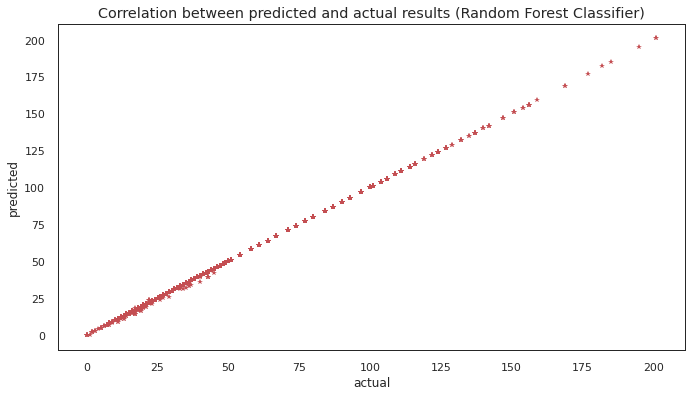

In [103]:
print('Correlation: ', round(np.corrcoef(np.ravel(y_test), np.ravel(pred_rfc))[0,1], 5))
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between predicted and actual results (Random Forest Classifier)')
plt.plot(y_test, pred_rfc, 'r*')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [104]:
# Random Forest Classifier -> accuracy of 70%
# for classification using 2 labels (instead of 7 -> accuracy of 88%)

# Random Forest Classifier -> accuracy of 70%
# for classification using 2 labels (instead of 7 -> accuracy of 88%)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         3
           7       0.82      1.00      0.90         9
           8       0.95      0.90      0.93        21
           9       0.71      0.83      0.77         6
          10       1.00      1.00      1.00         8
          11       0.84      0.89      0.86        18
          12       0.92      0.92      0.92        12
          13       0.88      0.88      0.88        24
          14       0.71      0.92      0.80        37
          15       0.64      0.50      0.56        18
          16       0.75      0.75      0.75        20
          17       0.82    

In [105]:
# Confusion matrix for the random forest classification
# The diagonal elements - the number of points for which the predicted label is equal to the true label
# off-diagonal elements - mislabeled by the classifier.
print(confusion_matrix(y_test, pred_rfc))

[[7 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [106]:
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)


Error = np.mean(np.abs(np.subtract(y_test,pred_rfc)))
Average = np.mean(y_test)
MAPE = (Error/Average)*100

print('MAPE=',MAPE,'%.')
print('Accuracy=',100-MAPE,'%.')

MAPE= 0.08722591512016122 %.
Accuracy= 99.91277408487984 %.


In [107]:
###
# Stochastic Gradient Descent Classifier
# The advantages of SGD:
# - Efficiency.
# - Ease of implementation (lots of opportunities for code tuning).
# The disadvantages of SGD:
# - SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
# - SGD is sensitive to feature scaling.

sgd = SGDClassifier(penalty="elasticnet", max_iter=2000, tol=0.00001, loss="modified_huber")
sgd.fit(X_train, np.ravel(y_train))
pred_sgd = sgd.predict(X_test)
# print(sgd.coef_)
# print some values (correct and predicted ones)
print('correct:  ', np.ravel(y_test.values[0:15]))
print('predicted:', np.ravel(pred_sgd[0:15]))

correct:   [42 14 34 84 93 27 23 37 18 42 30 44 21 48 34]
predicted: [47 19 29 47 47 29 19 41 19 47 31 29 22 47 28]


In [108]:
# print quality labels
for i in range(3,10):
    print('     ' + str(i), end='')
print('\n')
pred_prob = sgd.predict_proba(X_test)[0:15]
# print correct result and predicted probabilities for each value
for i in range(0,15):
    print(y_test.values[i], pred_prob[i])

     3     4     5     6     7     8     9

42 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.023 0.    0.    0.057 0.096 0.113 0.026 0.    0.028 0.007
 0.01  0.047 0.058 0.02  0.    0.08  0.023 0.137 0.042 0.04  0.    0.14
 0.03  0.    0.017 0.005 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.   ]
14 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.028
 0.027 0.072 0.    0.    0.    0.03  0.004 0.17  0.    0.045 0.062 0.062
 0.076 0.026 0.059 0.011 0.055 0.053 0.057 0.049 0.02  0.019 0.007 0.001
 0.015 0.02  0.029 0.001 0.    0.001 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.   

Correlation:  0.82194


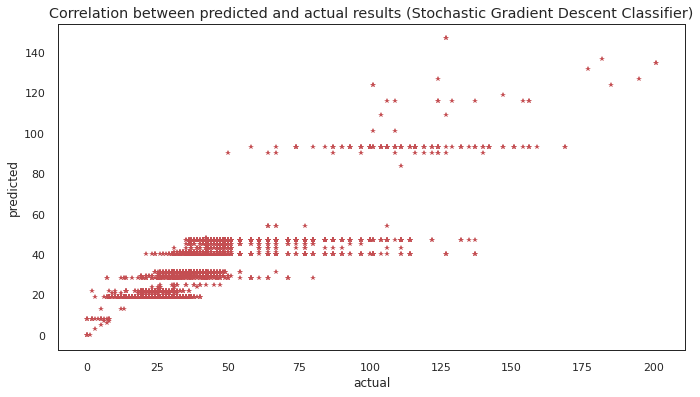

In [109]:
print('Correlation: ', round(np.corrcoef(np.ravel(y_test), np.ravel(pred_sgd))[0,1], 5))
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between predicted and actual results (Stochastic Gradient Descent Classifier)')
plt.plot(y_test, pred_sgd, 'r*')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [110]:
# Stochastic Gradient Descent Classifier -> accuracy of 5%
# for classification using 2 labels 
print(classification_report(y_test, pred_sgd))

# 51% accuracy using stochastic gradient descent classifier
print(confusion_matrix(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         1
           5       1.00      0.17      0.29         6
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         9
           8       0.17      0.14      0.15        21
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        12
          13       0.33      0.04      0.07        24
          14       0.00      0.00      0.00        37
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        20
          17       0.00    

In [111]:
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)


Error = np.mean(np.abs(np.subtract(y_test,pred_sgd)))
Average = np.mean(y_test)
MAPE = (Error/Average)*100

print('MAPE=',MAPE,'%.')
print('Accuracy=',100-MAPE,'%.')

MAPE= 23.685746082353294 %.
Accuracy= 76.31425391764671 %.


In [112]:
###
# Support Vector Classifier
# fit time complexity is more than quadratic with the number of samples -> hard to scale more than 10000 samples.
# probability=True - to use predict_proba method

svc = SVC(probability=True)
svc.fit(X_train, np.ravel(y_train))
pred_svc = svc.predict(X_test)
# print some values (correct and predicted ones)
print('correct:  ', np.ravel(y_test.values[0:15]))
print('predicted:', pred_svc[0:15])

correct:   [42 14 34 84 93 27 23 37 18 42 30 44 21 48 34]
predicted: [42 14 36 97 93 29 25 36 14 44 31 42 19 47 32]


In [113]:
# print quality labels
for i in range(3,10):
    print('     ' + str(i), end='')
print('\n')
pred_prob = svc.predict_proba(X_test)[0:15]
# print correct result and predicted probabilities for each value
for i in range(0,15):
    print(y_test.values[i], pred_prob[i])

     3     4     5     6     7     8     9

42 [1.576e-04 1.362e-04 1.568e-04 1.672e-04 1.395e-04 1.614e-04 1.828e-04
 1.747e-04 1.868e-04 1.798e-04 1.990e-04 2.096e-04 2.002e-04 2.114e-04
 2.157e-04 2.565e-04 2.427e-04 2.286e-04 2.430e-04 2.423e-04 2.542e-04
 2.559e-04 2.777e-04 3.076e-04 3.122e-04 3.274e-04 3.418e-04 4.047e-04
 4.369e-04 4.339e-04 5.404e-04 4.908e-04 6.858e-04 7.663e-04 9.859e-04
 1.535e-03 1.062e-03 6.846e-03 1.256e-02 3.100e-02 2.980e-02 1.913e-01
 2.771e-01 2.807e-01 8.299e-02 4.034e-02 1.182e-02 2.327e-03 3.848e-03
 1.999e-03 1.135e-03 9.009e-04 1.106e-03 9.509e-04 5.982e-04 5.268e-04
 6.087e-04 4.786e-04 3.797e-04 3.136e-04 4.194e-04 2.871e-04 3.336e-04
 2.477e-04 2.408e-04 2.595e-04 2.179e-04 2.953e-04 1.952e-04 2.480e-04
 1.824e-04 2.024e-04 1.968e-04 1.884e-04 1.695e-04 1.629e-04 1.776e-04
 1.702e-04 1.579e-04 1.592e-04 1.732e-04 1.555e-04 1.369e-04 1.477e-04
 1.392e-04 1.519e-04 1.273e-04 1.448e-04 1.502e-04 1.467e-04 1.393e-04
 1.596e-04 1.329e-04 1.235e-04

Correlation:  0.98074


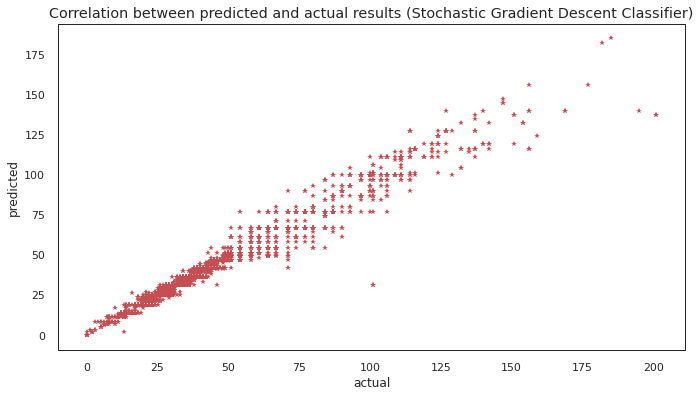

In [114]:
print('Correlation: ', round(np.corrcoef(np.ravel(y_test), np.ravel(pred_svc))[0,1], 5))
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between predicted and actual results (Stochastic Gradient Descent Classifier)')
plt.plot(y_test, pred_svc, 'r*')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [115]:

# Support Vector Classifier -> accuracy of 27%
# for classification using 2 labels (instead of 7 -> accuracy of 81%)
print(classification_report(y_test, pred_svc))

print(confusion_matrix(y_test, pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.00      0.00      0.00         1
           2       0.71      1.00      0.83         5
           3       0.67      0.67      0.67         3
           4       0.00      0.00      0.00         1
           5       1.00      0.67      0.80         6
           6       1.00      0.67      0.80         3
           7       0.62      0.56      0.59         9
           8       0.48      0.67      0.56        21
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         8
          11       0.44      0.83      0.58        18
          12       1.00      0.25      0.40        12
          13       0.83      0.21      0.33        24
          14       0.31      0.76      0.44        37
          15       0.50      0.22      0.31        18
          16       0.00      0.00      0.00        20
          17       0.33    

In [116]:
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)


Error = np.mean(np.abs(np.subtract(y_test,pred_svc)))
Average = np.mean(y_test)
MAPE = (Error/Average)*100

print('MAPE=',MAPE,'%.')
print('Accuracy=',100-MAPE,'%.')

MAPE= 5.697957710470117 %.
Accuracy= 94.30204228952988 %.


# Importance of characteristics

The depth of this tree is: 18
Variable: O3 1st Max Value     Importance: 0.9963384713920831
Variable: CO Mean              Importance: 0.0011838418769498935
Variable: O3 Mean              Importance: 0.00047961692893537414
Variable: SO2 AQI              Importance: 0.00037299827303402956
Variable: NO2 Mean             Importance: 0.00035395848473744325
Variable: SO2 Mean             Importance: 0.0003502203125374941
Variable: CO 1st Max Value     Importance: 0.00031187515118821796
Variable: NO2 1st Max Value    Importance: 0.00021996238946472006
Variable: SO2 1st Max Value    Importance: 0.00020245874425474665
Variable: NO2 AQI              Importance: 0.0001865964468150166


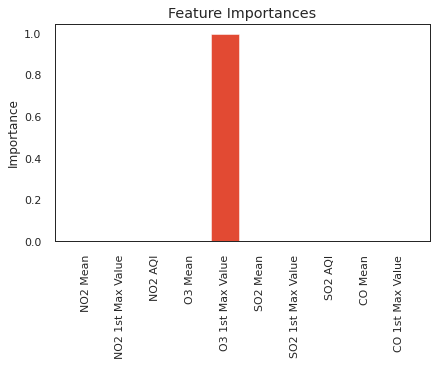

In [117]:
# there are trees with different depth: from 23 to 26
tree = rfg.estimators_[50]
print('The depth of this tree is:', tree.tree_.max_depth)

# Variable Importances
# Get numerical feature importances
importances = list(rfg.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Visualizations
# Variable Importances
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Feature Importances');

# Analysis of variance

,sum_sq,df,F,PR(>F)
Intercept,7.080500e+01,1.0,1.070307,3.008800e-01
C(AQI),1.469716e+02,82.0,0.027093,1.000000e+00
C(features),3.684464e+04,9.0,61.883690,1.141821e-113
C(AQI):C(features),2.552006e+05,738.0,5.227208,0.000000e+00
Residual,4.304107e+06,65062.0,NaN,NaN


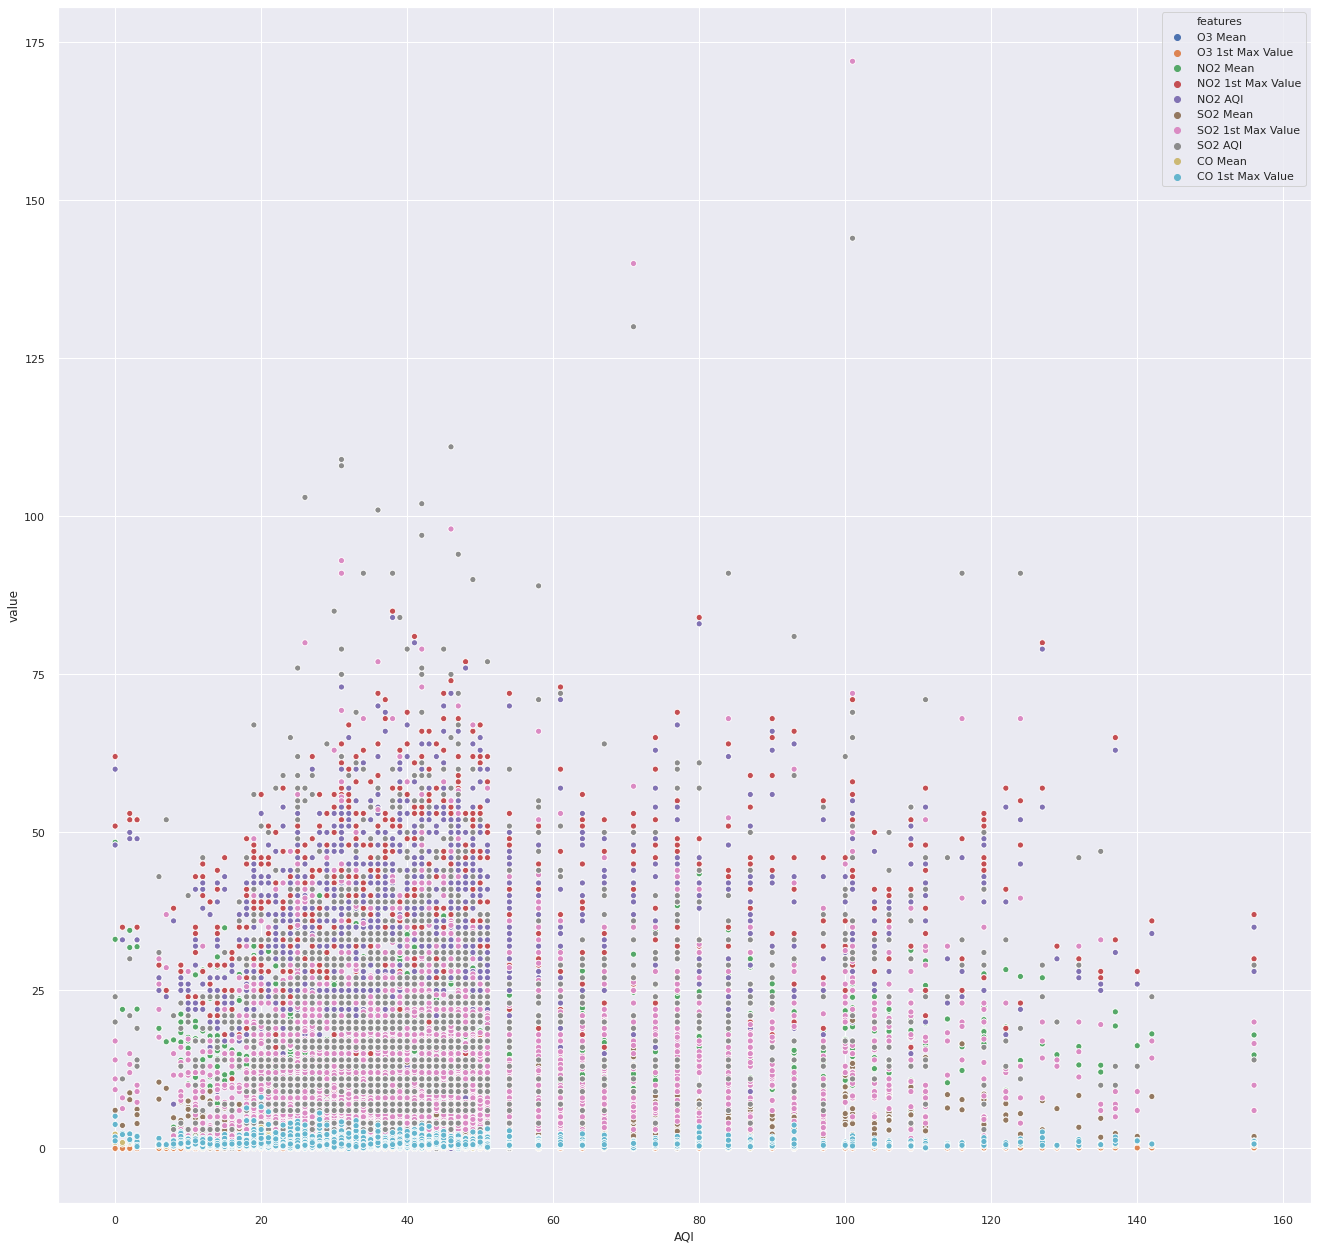

In [118]:
# load packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# load data file
d = pd.read_csv(r'/content/drive/My Drive/uspollution_pollution_us_2000_2016.csv')
d['Date Local']=pd.to_datetime(d['Date Local'])
d=d.loc[:'20151001']
d=d.loc[d['State']=='Missouri']
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['O3 AQI'], value_vars=['O3 Mean',
                            'O3 1st Max Value',
                             'NO2 Mean',
                            'NO2 1st Max Value',
                            'NO2 AQI',
                            'SO2 Mean',
                            'SO2 1st Max Value',
                            'SO2 AQI','CO Mean',
                            'CO 1st Max Value'                           
                            ])
# replace column names
d_melt.columns = ['AQI', 'features', 'value']
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.set(rc={'figure.figsize':(20,22)})
sns.scatterplot(x="AQI", y="value", hue="features", data=d_melt)

import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(AQI) + C(features) + C(AQI):C(features)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table